# Using the GIS 

Importar el módulo de GIS. 

In [1]:
from arcgis.gis import GIS

Solicitar la contraseña al usuario

In [2]:
import getpass

Creación de un objeto GIS conectándonos a ArcGIS online

In [3]:
password=getpass.getpass("Enter password: ")
gis = GIS("https://www.arcgis.com", "marialebu", password)
print ("Logged in as "+ str(gis.properties.user.username)) 

Enter password: ········
Logged in as marialebu


# Buscando Contenido

In [4]:
search_result = gis.content.search(query="title:Colombia*")
print(len(search_result))
search_result

10


[<Item title:"Hidrografía Colombiana - IDEAM y SiGaia" type:Web Map owner:SiGaia>,
 <Item title:"DGCM_Colombia_Reference" type:Map Service owner:UOdocent>,
 <Item title:"Planchas IGAC Colombia" type:Web Map owner:SiGaia>,
 <Item title:"DGCM_Colombia_Base" type:Map Service owner:UOdocent>,
 <Item title:"Vías terrestres principales de Colombia" type:Web Map owner:SiGaia>,
 <Item title:"Cobertura Radio Nacional de Colombia (Municipios)" type:Web Mapping Application owner:RTVCadministrador>,
 <Item title:"Colombia - Biomas potenciales" type:Web Map owner:alejandro.herrera>,
 <Item title:"Cobertura Radio Nacional de Colombia AM y FM (Municipios)" type:Web Map owner:RTVCadministrador>,
 <Item title:"Departamentos_Colombia" type:Feature Service owner:javier.ruiz_uaegrtd>,
 <Item title:"Logo Esri Colombia-Blanco pequeño" type:Image owner:BinGeo>]

<Item title:"Hidrografía Colombiana - IDEAM y SiGaia" type:Web Map owner:SiGaia>
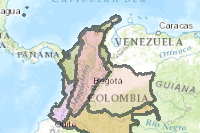

<Item title:"DGCM_Colombia_Reference" type:Map Service owner:UOdocent>
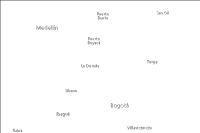

<Item title:"Planchas IGAC Colombia" type:Web Map owner:SiGaia>
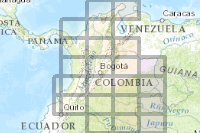

<Item title:"DGCM_Colombia_Base" type:Map Service owner:UOdocent>
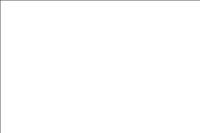

<Item title:"Vías terrestres principales de Colombia" type:Web Map owner:SiGaia>
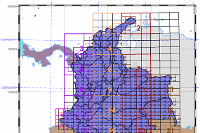

<Item title:"Cobertura Radio Nacional de Colombia (Municipios)" type:Web Mapping Application owner:RTVCadministrador>
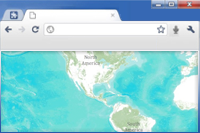

<Item title:"Colombia - Biomas potenciales" type:Web Map owner:alejandro.herrera>
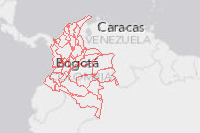

<Item title:"Cobertura Radio Nacional de Colombia AM y FM (Municipios)" type:Web Map owner:RTVCadministrador>
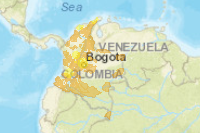

<Item title:"Departamentos_Colombia" type:Feature Service owner:javier.ruiz_uaegrtd>

<Item title:"Logo Esri Colombia-Blanco pequeño" type:Image owner:BinGeo>

In [5]:
from IPython.display import display
for item in search_result: 
    display(item)

Saber el id de un item dentro de la búsqueda que realizamos anteriormente

In [6]:
first_item = search_result[0]
know_item_id = first_item.id
print(know_item_id)

103b63dcc9f448acbd63f22b728b1a02


Accediendo a contenido directamente con la función get()

<Item title:"Hidrografía Colombiana - IDEAM y SiGaia" type:Web Map owner:SiGaia>
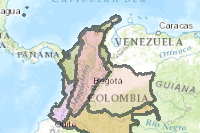

In [7]:
gis.content.get("103b63dcc9f448acbd63f22b728b1a02")

## Creando nuevo contenido

Añadimos un archivo csv y lo publicamos como un Feature Layer dentro del contenido de nuestra organización. 

In [8]:
#Nos conectamos a la cuenta de nuestra organización. 
password=getpass.getpass("Enter password: ")
gis = GIS("https://malejandrablanco.maps.arcgis.com", "malejabu", password)
print ("Logged in as "+ str(gis.properties.user.username)) 

Enter password: ········
Logged in as malejabu


In [9]:
csv_path= r"C:\Users\Trabajo\Documents\Meetups\Ejemplos\NGranada_1811\NGranada_1811_0.csv"
#Note que las propiedaddes se añaden como un diccionario de python. 
csv_properties= {'title': 'Provincia de la Nueva Granada: Mapa Político', 'description': 'División política de Nueva Granada en 1810', 'tags': 'arcgis, python, Colombia, map'}
#Añadimos el objeto 
csv_item= gis.content.add(item_properties=csv_properties, data=csv_path)
#No añadimos la miniatura! Pero se puede agregar con:
#csv_item= gis.content.add(item_properties, data, thumbnail)

Podemos consultar que el item se agregara como CSV llamando la variable que previamente definimos.

In [10]:
csv_item

<Item title:"Provincia de la Nueva Granada: Mapa Político" type:CSV owner:malejabu>

## Publicando el Item en ArcGIS Online

Para realizar la publicación del item dentro de nuestra organización, utilizamos el método publish() 

<Item title:"Provincia de la Nueva Granada: Mapa Político" type:Feature Service owner:malejabu>
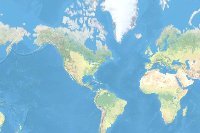

In [11]:
#Publicamos el item dentro de nuestra organización 
feature_layer_item= csv_item.publish() 
#Mostramos el item ya publicado. 
feature_layer_item

Se puede actualizar propiedades, miniaturas, tags,  de los items de nuestra organización

In [12]:
feature_layer_item.update(item_properties={'tags': 'python, map, colombia, historical'})

True

In [ ]:
feature_layer_item.tags

## Descargar datos de un item

<Item title:"colombia" type:Layer Package owner:jdpinzon>
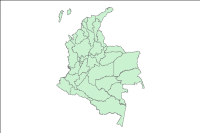

In [13]:
#La función get_data nos permite acceder a los datos de un item
#En caso de que sea un objeto JSON
#se guardará como un diccionario. 
extreme_csv_item=gis.content.get('adc3b62d3c1c4e98a28abfb8503fd171')
extreme_csv_item

In [14]:
extreme_csv_item.get_data()

'C:\\Users\\Trabajo\\AppData\\Local\\Temp\\colombia.lpk'